In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

# Data

In [2]:
df = pd.read_csv("../datasets/mushroom_cleaned.csv")
df = df.drop("gill-attachment", axis=1)
df.columns = [col.replace("-", "") for col in df.columns]

print(df.shape)
df.head()

(54035, 8)


,capdiameter,capshape,gillcolor,stemheight,stemwidth,stemcolor,season,class
0,1372,2,10,3.807467,1545,11,1.804273,1
1,1461,2,10,3.807467,1557,11,1.804273,1
2,1371,2,10,3.612496,1566,11,1.804273,1
3,1261,6,10,3.787572,1566,11,1.804273,1
4,1305,6,10,3.711971,1464,11,0.943195,1


In [3]:
df.isnull().sum()

capdiameter    0
capshape       0
gillcolor      0
stemheight     0
stemwidth      0
stemcolor      0
season         0
class          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   capdiameter  54035 non-null  int64  
 1   capshape     54035 non-null  int64  
 2   gillcolor    54035 non-null  int64  
 3   stemheight   54035 non-null  float64
 4   stemwidth    54035 non-null  int64  
 5   stemcolor    54035 non-null  int64  
 6   season       54035 non-null  float64
 7   class        54035 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 3.3 MB


<Axes: xlabel='class', ylabel='count'>

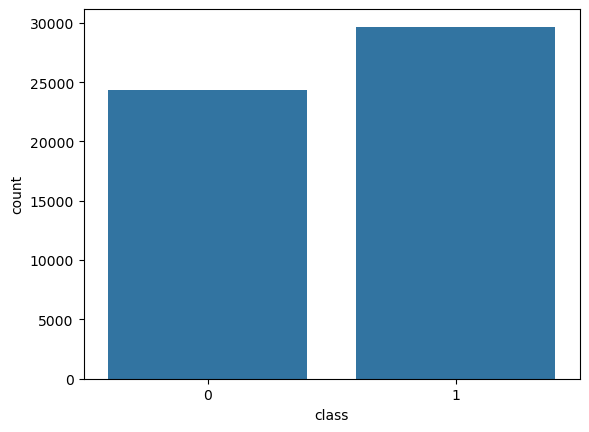

In [5]:
sns.countplot(data=df, x="class")

# GLM

In [6]:
X = df.drop("class", axis=1)
X = sm.add_constant(X)

y = df["class"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37824, 8), (16211, 8), (37824,), (16211,))

In [8]:
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                37824
Model:                            GLM   Df Residuals:                    37816
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24043.
Date:                Tue, 01 Oct 2024   Deviance:                       48087.
Time:                        07:33:30   Pearson chi2:                 3.78e+04
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09992
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.6919      0.055     30.768      

## Model Details

- **Dependent Variable:** `class`
- **No. Observations:** 37,824
- **Model Family:** Binomial (Logistic Regression)
- **Link Function:** Logit
- **Method:** Iterative Reweighted Least Squares (IRLS)
- **Log-Likelihood:** -24,043
- **Deviance:** 48,087
- **Pearson chi2:** 37,800
- **No. Iterations:** 4
- **Pseudo R-squared (CS):** 0.09992

## Coefficients and Interpretation

| Variable | Coefficient | Std. Error | z-value | P>\|z\| | 95% Conf. Interval | Interpretation |
|----------|-------------|------------|---------|---------|---------------------|----------------|
| **const** | 1.6919 | 0.055 | 30.768 | 0.000 | [1.584, 1.800] | The intercept (baseline log-odds) when all other variables are 0. |
| **cap-diameter** | -0.0004 | 5.58e-05 | -6.396 | 0.000 | [-0.000, -0.000] | A negative effect on the log-odds. For every unit increase in `cap-diameter`, the log-odds of belonging to `class` decrease slightly. |
| **cap-shape** | -0.0895 | 0.005 | -17.021 | 0.000 | [-0.100, -0.079] | A significant negative effect on the log-odds of belonging to the `class`. |
| **gill-color** | -0.0070 | 0.004 | -1.966 | 0.049 | [-0.014, -0.000022] | A small negative effect on the log-odds. This effect is marginally significant (p = 0.049). |
| **stem-height** | 0.7258 | 0.019 | 38.966 | 0.000 | [0.689, 0.762] | A large positive effect on the log-odds of belonging to the `class`. As `stem-height` increases, the log-odds increase significantly. |
| **stem-width** | -0.0003 | 2.54e-05 | -13.415 | 0.000 | [-0.000, -0.000] | A negative effect on the log-odds. The impact is statistically significant. |
| **stem-color** | -0.0686 | 0.003 | -19.755 | 0.000 | [-0.075, -0.062] | A strong negative impact on the log-odds of belonging to the `class`. |
| **season** | -0.4901 | 0.037 | -13.238 | 0.000 | [-0.563, -0.418] | A significant negative effect on the log-odds. The `season` variable strongly decreases the log-odds of being classified as the target class. |

## Summary of Results

- All coefficients are statistically significant at the 0.05 level, except `gill-color`, which is marginally significant (p = 0.049).
- **Stem height** has the largest positive impact on the log-odds of belonging to the target class, while **cap-shape** and **season** have strong negative impacts.
- **Cap-diameter**, **stem-width**, and **stem-color** also show negative effects, but their impact is smaller in magnitude.
- The model explains about 9.99% of the variation in the dependent variable (`class`), as indicated by the **Pseudo R-squared** value.

This interpretation suggests that changes in the independent variables significantly affect the likelihood of belonging to the target class, with stem-height being the most influential positive factor and season being a strong negative predictor.

## Model Equation

The logistic regression equation can be expressed as:

$$
\log\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n
$$

where:
- $ p $ is the probability of the outcome occurring (e.g., $ Y = 1 $),
- $ \beta_0 $ is the intercept (constant),
- $ \beta_1, \beta_2, \ldots, \beta_n $ are the coefficients for each predictor variable,
- $ X_1, X_2, \ldots, X_n $ are the predictor variables.

In [9]:
coefficients = result.params
variable_names = coefficients.index
variables = sp.symbols(variable_names)

log_odds = coefficients["const"]
log_odds += sum(coefficients[i] * variables[i] for i in range(len(variables)))
log_odds

-0.000356671329913686*capdiameter - 0.0895012315693918*capshape + 1.69185189191383*const - 0.00697944661121915*gillcolor - 0.490103499988829*season - 0.0686359331093984*stemcolor + 0.725791948483237*stemheight - 0.000340912835343969*stemwidth + 1.69185189191383

The probability of the outcome occurring can be expressed as:

$$
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n)}}
$$

where:
- $ p $ is the probability of the outcome occurring (e.g., $ Y = 1 $),
- $ \beta_0 $ is the intercept (constant),
- $ \beta_1, \beta_2, \ldots, \beta_n $ are the coefficients for each predictor variable,
- $ X_1, X_2, \ldots, X_n $ are the predictor variables,
- $ e $ is the base of the natural logarithm.


In [10]:
probability = 1 / (1 + sp.exp(-log_odds))
probability

1/(0.184178129988529*exp(0.000356671329913686*capdiameter + 0.0895012315693918*capshape - 1.69185189191383*const + 0.00697944661121915*gillcolor + 0.490103499988829*season + 0.0686359331093984*stemcolor - 0.725791948483237*stemheight + 0.000340912835343969*stemwidth) + 1)

In [11]:
y_pred_prob = result.predict(X_test)
y_pred_class = (y_pred_prob >= 0.5).astype(int)

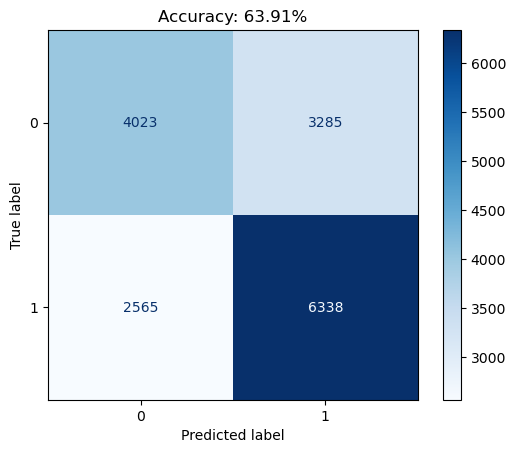

In [12]:
cm = confusion_matrix(y_test, y_pred_class)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

plt.title(f"Accuracy: {accuracy_score(y_test, y_pred_class) * 100:.2f}%")
plt.show()